In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, precision_recall_curve, roc_curve, auc, confusion_matrix,classification_report 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from scipy.cluster.hierarchy import dendrogram, linkage

In [40]:
df_train=pd.read_csv('training_data_cleansed.csv')
#df_train=pd.read_csv('training_data_cleansed_no_2009.csv')

In [156]:
print len(df_train)
df_train=df_train[df_train['year']!=2009]
print len(df_train)

40876
40876


In [168]:
len(adv_reac_70_train)

40876

In [42]:
df_test=pd.read_csv('predicting_data_cleansed.csv')

In [43]:
adv_reac_train=pd.read_csv('col_1_train.csv')

In [44]:
adv_reac_test=pd.read_csv('col_1_test.csv')

In [45]:
adv_reac_bool_train=pd.read_csv('col_1_bool_train.csv')

In [46]:
adv_reac_bool_test=pd.read_csv('col_1_bool_test.csv')

In [438]:
adv_reac_bool_test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,statement_of_identity,summary_of_safety_and_effectiveness,teratogenic_effects,troubleshooting,use_in_specific_populations,user_safety_warnings,version,veterinary_indications,warnings_and_cautions,when_using
0,0,1.0,-0.000221,0.000022,-0.000014,6.364556e-07,0.00001,0.000015,-0.00001,0.000017,...,0,0,0,0,0,0,1,0,0,0
1,1,1.0,-0.000221,0.000022,-0.000014,6.364556e-07,0.00001,0.000015,-0.00001,0.000017,...,0,0,0,0,0,0,1,0,0,0
2,2,1.0,-0.000221,0.000022,-0.000014,6.364556e-07,0.00001,0.000015,-0.00001,0.000017,...,0,0,0,0,0,0,1,0,0,0
3,3,1.0,-0.000221,0.000022,-0.000014,6.364556e-07,0.00001,0.000015,-0.00001,0.000017,...,0,0,0,0,0,0,1,0,0,0
4,4,1.0,-0.000221,0.000022,-0.000014,6.364556e-07,0.00001,0.000015,-0.00001,0.000017,...,0,0,0,0,0,0,1,0,0,0


In [173]:
adv_reac_70_train=pd.read_csv('col_1_70_train.csv')
adv_reac_70_test=pd.read_csv('col_1_70_test.csv')
adv_reac_70_bool_train=pd.read_csv('col_1_70_plus_bool_train.csv')
adv_reac_70_bool_test=pd.read_csv('col_1_70_plus_bool_test.csv')

In [160]:
print len(adv_reac_70_train)
print len(adv_reac_70_bool_train)



40876
43952


In [48]:
spl_train=pd.read_csv('col_9_train.csv')
spl_test=pd.read_csv('col_9_test.csv')
spl_bool_train=pd.read_csv('col_9_bool_train.csv')
spl_bool_test=pd.read_csv('col_9_bool_test.csv')

In [49]:
y_train=df_train['target'][df_train['year']!=2009]
y_test=df_test['target']

In [117]:
rfc=RandomForestClassifier(n_jobs=-1,class_weight='balanced',random_state=100)

In [118]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [119]:
hyperparameters={
    'criterion': ['gini','entropy'],
    'n_estimators': [30,300],
    'min_samples_leaf': [1, 5]
    }

In [170]:
param_dist = {"max_depth": [3, None],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": sp_randint(10,500)
             }

In [120]:
grid_search=GridSearchCV(rfc,hyperparameters,scoring='recall')
grid_search_spl=GridSearchCV(rfc,hyperparameters,scoring='recall')
grid_search_70=GridSearchCV(rfc,hyperparameters,scoring='recall')

In [171]:
random_search=RandomizedSearchCV(rfc,param_dist,scoring='recall',n_iter=100,n_jobs=-1)


In [238]:
random_search_spl=RandomizedSearchCV(rfc,param_dist,scoring='recall',n_iter=10,n_jobs=-1)

In [241]:
random_search_70=RandomizedSearchCV(rfc,param_dist,scoring='recall',n_iter=100,n_jobs=-2)

In [172]:
random_search.fit(adv_reac_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1107c8590>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11674cf90>, 'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116f61e50>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, 

In [240]:
random_search_spl.fit(spl_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1107c8590>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11674cf90>, 'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116f61e50>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, s

In [242]:
random_search_70.fit(adv_reac_70_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-2,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1107c8590>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11674cf90>, 'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116f61e50>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, 

In [125]:
grid_search.fit(adv_reac_train,y_train)



GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 300], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [126]:
grid_search_spl.fit(spl_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 300], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [122]:
grid_search_70.fit(adv_reac_70_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 300], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [243]:
print grid_search.best_estimator_
print grid_search_spl.best_estimator_
print grid_search_70.best_estimator_
print random_search.best_estimator_
print random_search_spl.best_estimator_
print random_search_70.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples

In [244]:
print grid_search.best_score_
print grid_search_spl.best_score_
print grid_search_70.best_score_
print random_search.best_score_
print random_search_spl.best_score_
print random_search_70.best_score_

0.189389306016
0.159087017054
0.295447317386
0.537869521124
0.492413307653
0.515140024375


In [245]:
print grid_search.best_params_
print grid_search_spl.best_params_
print grid_search_70.best_params_
print random_search.best_params_
print random_search_spl.best_params_
print random_search_70.best_params_

{'n_estimators': 30, 'criterion': 'entropy', 'min_samples_leaf': 5}
{'n_estimators': 30, 'criterion': 'entropy', 'min_samples_leaf': 5}
{'n_estimators': 300, 'criterion': 'entropy', 'min_samples_leaf': 5}
{'bootstrap': False, 'min_samples_leaf': 7, 'n_estimators': 194, 'criterion': 'gini', 'min_samples_split': 7, 'max_depth': 3}
{'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 309, 'criterion': 'gini', 'min_samples_split': 9, 'max_depth': 3}
{'bootstrap': False, 'min_samples_leaf': 5, 'n_estimators': 99, 'criterion': 'entropy', 'min_samples_split': 9, 'max_depth': 3}


In [246]:
best=grid_search.best_estimator_
best_spl=grid_search_spl.best_estimator_
best_70=grid_search_70.best_estimator_
best_rand=random_search.best_estimator_
best_rand_spl=random_search_spl.best_estimator_
best_rand_70=random_search_70.best_estimator_

In [131]:
best.fit(adv_reac_train,y_train)
best_spl.fit(spl_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [132]:
best_70.fit(adv_reac_70_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [178]:
best_rand.fit(adv_reac_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=7, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=194, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [247]:
best_rand_spl.fit(spl_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=309, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [248]:
best_rand_70.fit(adv_reac_70_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=99, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [249]:
predictions_train=best.predict(adv_reac_train)
predictions_test=best.predict(adv_reac_test)
predictions_spl_train=best_spl.predict(spl_train)
predictions_spl_test=best_spl.predict(spl_test)
predictions_70_train=best_70.predict(adv_reac_70_train)
predictions_70_test=best_70.predict(adv_reac_70_test)
predictions_rand_train=best_rand.predict(adv_reac_train)
predictions_rand_test=best_rand.predict(adv_reac_test)

predictions_rand_spl_train=best_rand_spl.predict(spl_train)
predictions_rand_spl_test=best_rand_spl.predict(spl_test)

predictions_rand_70_train=best_rand_70.predict(adv_reac_70_train)
predictions_rand_70_test=best_rand_70.predict(adv_reac_70_test)


In [250]:
print recall_score(y_train,predictions_train)
print recall_score(y_test,predictions_test)
print '\n'
print precision_score(y_train,predictions_train)
print precision_score(y_test,predictions_test)
print '\n'
print recall_score(y_train,predictions_spl_train)
print recall_score(y_test,predictions_spl_test)
print '\n'
print precision_score(y_train,predictions_spl_train)
print precision_score(y_test, predictions_spl_test)
print '\n'
print recall_score(y_train,predictions_70_train)
print recall_score(y_test, predictions_70_test)
print '\n'
print precision_score(y_train,predictions_70_train)
print precision_score(y_test, predictions_70_test)
print '\n'
print recall_score(y_train,predictions_rand_train)
print recall_score(y_test, predictions_rand_test)

print '\n'
print precision_score(y_train,predictions_rand_train)
print precision_score(y_test, predictions_rand_test)
print '\n'
print recall_score(y_train,predictions_rand_spl_train)
print recall_score(y_test, predictions_rand_spl_test)
print '\n'

print precision_score(y_train,predictions_rand_spl_train)
print precision_score(y_test, predictions_rand_spl_test)
print '\n'
print recall_score(y_train,predictions_rand_70_train)
print recall_score(y_test, predictions_rand_70_test)
print '\n'
print precision_score(y_train,predictions_rand_70_train)
print precision_score(y_test, predictions_rand_70_test)

0.931818181818
0.0266666666667


0.372727272727
0.021978021978


0.954545454545
0.0


0.572727272727
0.0


1.0
0.02


0.4
0.0167597765363


0.643939393939
0.26


0.0311013538236
0.0113570180547


0.818181818182
0.0


0.0557275541796
0.0


0.643939393939
0.293333333333


0.019495412844
0.00792649972978


In [251]:
cm_train=pd.DataFrame(confusion_matrix(y_train,predictions_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_spl_train=pd.DataFrame(confusion_matrix(y_train,predictions_spl_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_70_train=pd.DataFrame(confusion_matrix(y_train,predictions_70_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_rand_train=pd.DataFrame(confusion_matrix(y_train,predictions_rand_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

cm_rand_spl_train=pd.DataFrame(confusion_matrix(y_train,predictions_rand_spl_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

cm_rand_70_train=pd.DataFrame(confusion_matrix(y_train,predictions_rand_70_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [253]:
print 'Adverse Reactions Training\n',cm_train
print 'Product Labeling Training\n',cm_spl_train
print 'Adverse Reactions 70%PCA Training\n',cm_70_train
print 'Adverse Reactions Training - RandomSearch\n',cm_rand_train
print 'Product Labeling Training - RandomSearch\n',cm_rand_spl_train
print 'Adverse Reactions 70%PCA Training - RandomSearch\n',cm_rand_70_train

 Adverse Reactions Training
          Pred. 0  Pred. 1
Actual 0    40537      207
Actual 1        9      123
Product Labeling Training
          Pred. 0  Pred. 1
Actual 0    40650       94
Actual 1        6      126
Adverse Reactions 70%PCA Training
          Pred. 0  Pred. 1
Actual 0    40546      198
Actual 1        0      132
Adverse Reactions Training - RandomSearch
          Pred. 0  Pred. 1
Actual 0    38096     2648
Actual 1       47       85
Product Labeling Training - RandomSearch
          Pred. 0  Pred. 1
Actual 0    38914     1830
Actual 1       24      108
Adverse Reactions 70%PCA Training - RandomSearch
          Pred. 0  Pred. 1
Actual 0    36469     4275
Actual 1       47       85


In [254]:
cm_test=pd.DataFrame(confusion_matrix(y_test,predictions_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_spl_test=pd.DataFrame(confusion_matrix(y_test,predictions_spl_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_70_test=pd.DataFrame(confusion_matrix(y_test,predictions_70_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_rand_test=pd.DataFrame(confusion_matrix(y_test,predictions_rand_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

cm_rand_spl_test=pd.DataFrame(confusion_matrix(y_test,predictions_rand_spl_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

cm_rand_70_test=pd.DataFrame(confusion_matrix(y_test,predictions_rand_70_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [255]:
print 'Adverse Reactions Testing\n',cm_test
print 'Product Labeling Testing\n',cm_spl_test
print 'Adverse Reactions 70%PCA Testing\n',cm_70_test
print 'Adverse Reactions Testing - RandomSearch\n',cm_rand_test
print 'Product Labeling Testing - RandomSearch\n',cm_rand_spl_test
print 'Adverse Reactions 70%PCA Testing - RandomSearch\n',cm_rand_70_test

Adverse Reactions Testing
          Pred. 0  Pred. 1
Actual 0    43624      178
Actual 1      146        4
Product Labeling Testing
          Pred. 0  Pred. 1
Actual 0    43802        0
Actual 1      150        0
Adverse Reactions 70%PCA Testing
          Pred. 0  Pred. 1
Actual 0    43626      176
Actual 1      147        3
Adverse Reactions Testing - RandomSearch
          Pred. 0  Pred. 1
Actual 0    40407     3395
Actual 1      111       39
Product Labeling Testing - RandomSearch
          Pred. 0  Pred. 1
Actual 0    43756       46
Actual 1      150        0
Adverse Reactions 70%PCA Testing - RandomSearch
          Pred. 0  Pred. 1
Actual 0    38295     5507
Actual 1      106       44


In [69]:
##############################

In [143]:
rfc_2=RandomForestClassifier(n_jobs=-1,class_weight='balanced',random_state=100)

In [256]:
grid_search_2=GridSearchCV(rfc_2,hyperparameters,scoring='recall')
grid_search_2_spl=GridSearchCV(rfc_2,hyperparameters,scoring='recall')
grid_search_2_70=GridSearchCV(rfc_2,hyperparameters,scoring='recall')
random_search_2=RandomizedSearchCV(rfc_2,param_dist,scoring='recall',n_iter=100,n_jobs=-2)
random_search_2_70=RandomizedSearchCV(rfc_2,param_dist,scoring='recall',n_iter=100,n_jobs=-2)

In [92]:
for col in spl_bool_train:
    spl_bool_train[col]=spl_bool_train[col].fillna(0)

In [188]:
for col in adv_reac_bool_train:
    adv_reac_bool_train[col]=adv_reac_bool_train[col].fillna(0)

In [189]:
adv_reac_bool_train.isnull().sum()

Unnamed: 0                             0
0                                      0
1                                      0
2                                      0
3                                      0
4                                      0
5                                      0
6                                      0
7                                      0
8                                      0
9                                      0
10                                     0
11                                     0
12                                     0
13                                     0
14                                     0
15                                     0
16                                     0
17                                     0
18                                     0
19                                     0
20                                     0
21                                     0
22                                     0
23              

In [197]:
grid_search_2.fit(adv_reac_bool_train,y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 300], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [198]:
grid_search_2_spl.fit(spl_bool_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 300], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [192]:
for col in adv_reac_70_bool_train:
    adv_reac_70_bool_train[col]=adv_reac_70_bool_train[col].fillna(0)

In [193]:
adv_reac_70_bool_train.isnull().sum()

Unnamed: 0                               0
0                                        0
1                                        0
2                                        0
3                                        0
4                                        0
5                                        0
6                                        0
7                                        0
8                                        0
9                                        0
10                                       0
11                                       0
12                                       0
13                                       0
14                                       0
15                                       0
16                                       0
17                                       0
18                                       0
19                                       0
20                                       0
21                                       0
22         

In [194]:
grid_search_2_70.fit(adv_reac_70_bool_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 300], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [195]:
random_search_2.fit(adv_reac_bool_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-2,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1107c8590>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11674cf90>, 'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116f61e50>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, 

In [257]:
random_search_2_70.fit(adv_reac_70_bool_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-2,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1107c8590>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11674cf90>, 'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116f61e50>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, 

In [259]:
print grid_search_2.best_estimator_
print grid_search_2_spl.best_estimator_
print grid_search_2_70.best_estimator_
print random_search_2.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [261]:

print random_search_2_70.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=9, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)


In [ ]:
print grid_search_2.best_score_
print grid_search_2_spl.best_score_
print grid_search_2_70.best_score_
print random_search_2.best_score_


In [262]:
print random_search_2_70.best_score_

0.537867853108


In [263]:
print grid_search_2.best_params_
print grid_search_2_spl.best_params_
print grid_search_2_70.best_params_
print random_search_2.best_params_
print random_search_2_70.best_params_

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [264]:
best_2=grid_search_2.best_estimator_
best_2_spl=grid_search_2_spl.best_estimator_
best_2_70=grid_search_2_70.best_estimator_
best_2_rand=random_search_2.best_estimator_


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [298]:
best_2_rand

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=482, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [433]:
best_2_rand

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=482, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [265]:
best_2_rand_70=random_search_2_70.best_estimator_

In [203]:
best_2.fit(adv_reac_bool_train,y_train)
best_2_spl.fit(spl_bool_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [204]:
best_2_70.fit(adv_reac_70_bool_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [205]:
best_2_rand.fit(adv_reac_bool_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=482, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [266]:
best_2_rand_70.fit(adv_reac_70_bool_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=9, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [267]:
predictions_2_train=best_2.predict(adv_reac_bool_train)
predictions_2_test=best_2.predict(adv_reac_bool_test)
predictions_2_spl_train=best_2_spl.predict(spl_bool_train)
predictions_2_spl_test=best_2_spl.predict(spl_bool_test)
predictions_2_70_train=best_2_70.predict(adv_reac_70_bool_train)
predictions_2_70_test=best_2_70.predict(adv_reac_70_bool_test)
predictions_2_rand_train=best_2_rand.predict(adv_reac_bool_train)
predictions_2_rand_test=best_2_rand.predict(adv_reac_bool_test)

predictions_2_rand_70_train=best_2_rand_70.predict(adv_reac_70_bool_train)
predictions_2_rand_70_test=best_2_rand_70.predict(adv_reac_70_bool_test)

In [340]:
predictions_train=pd.DataFrame(predictions_2_rand_train,columns=['predictions'])

In [342]:
df_final_train=df_train.join(predictions_train)#,rsuffix='Predictions')

In [343]:
predictions_test=pd.DataFrame(predictions_2_rand_test,columns=['predictions'])

In [344]:
df_final_test=df_test.join(predictions_test)#,rsuffix='Predictions')

In [345]:
df_final_train.to_csv('training_data_w_predictions.csv')
df_final_test.to_csv('testing_data_w_predictions.csv')

In [346]:
true_positives=df_final_test[(df_final_test['target']==1) & (df_final_test['predictions']==1)]

In [347]:
false_positives=df_final_test[(df_final_test['target']==0) & (df_final_test['predictions']==1)]

In [349]:
print true_positives['predictions'].sum()
print false_positives['predictions'].sum()

63
3857


In [328]:
df_final_test[0].sum()

3574

In [326]:
predictions_2_rand_test.sum()

3920

In [329]:
y_test.sum()

150

In [331]:
df_test['target'].sum()

150

In [268]:
print recall_score(y_train,predictions_2_train)
print recall_score(y_test,predictions_2_test)
print '\n'
print precision_score(y_train,predictions_2_train)
print precision_score(y_test,predictions_2_test)
print '\n'
print recall_score(y_train,predictions_2_spl_train)
print recall_score(y_test,predictions_2_spl_test)
print '\n'
print precision_score(y_train,predictions_2_spl_train)
print precision_score(y_test,predictions_2_spl_test)
print '\n'
print recall_score(y_train,predictions_2_70_train)
print recall_score(y_test,predictions_2_70_test)
print '\n'
print precision_score(y_train,predictions_2_70_train)
print precision_score(y_test,predictions_2_70_test)
print '\n'
print recall_score(y_train,predictions_2_rand_train)
print recall_score(y_test,predictions_2_rand_test)
print '\n'
print precision_score(y_train,predictions_2_rand_train)
print precision_score(y_test,predictions_2_rand_test)

print '\n'
print recall_score(y_train,predictions_2_rand_70_train)
print recall_score(y_test,predictions_2_rand_70_test)
print '\n'
print precision_score(y_train,predictions_2_rand_70_train)
print precision_score(y_test,predictions_2_rand_70_test)

0.916666666667
0.02


0.159210526316
0.00433526011561


0.962121212121
0.0


0.596244131455
0.0


0.863636363636
0.00666666666667


0.207272727273
0.0018315018315


0.643939393939
0.42


0.028071334214
0.0160714285714


0.643939393939
0.52


0.0139435695538
0.0105107128419


In [269]:
cm_2_train=pd.DataFrame(confusion_matrix(y_train,predictions_2_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_spl_train=pd.DataFrame(confusion_matrix(y_train,predictions_2_spl_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_70_train=pd.DataFrame(confusion_matrix(y_train,predictions_2_70_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_rand_train=pd.DataFrame(confusion_matrix(y_train,predictions_2_rand_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_rand_70_train=pd.DataFrame(confusion_matrix(y_train,predictions_2_rand_70_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [270]:
print 'Adverse Reactions +Bool Training\n',cm_2_train

print 'Product Labeling +Bool Training\n',cm_2_spl_train
print 'Adverse Reactions 70%PCA +Bool Training\n',cm_2_70_train
print 'Adverse Reactions +Bool Training - RandomSearch\n',cm_2_rand_train
print 'Adverse Reactions 70%PCA +Bool Training - RandomSearch\n',cm_2_rand_70_train

Adverse Reactions +Bool Training
          Pred. 0  Pred. 1
Actual 0    40105      639
Actual 1       11      121
Product Labeling +Bool Training
          Pred. 0  Pred. 1
Actual 0    40658       86
Actual 1        5      127
Adverse Reactions 70%PCA +Bool Training
          Pred. 0  Pred. 1
Actual 0    40308      436
Actual 1       18      114
Adverse Reactions +Bool Training - RandomSearch
          Pred. 0  Pred. 1
Actual 0    37801     2943
Actual 1       47       85
Adverse Reactions 70%PCA +Bool Training - RandomSearch
          Pred. 0  Pred. 1
Actual 0    34733     6011
Actual 1       47       85


In [271]:
cm_2_test=pd.DataFrame(confusion_matrix(y_test,predictions_2_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_spl_test=pd.DataFrame(confusion_matrix(y_test,predictions_2_spl_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_70_test=pd.DataFrame(confusion_matrix(y_test,predictions_2_70_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_rand_test=pd.DataFrame(confusion_matrix(y_test,predictions_2_rand_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_rand_70_test=pd.DataFrame(confusion_matrix(y_test,predictions_2_rand_70_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [297]:
print 'Adverse Reactions +Bool Testing\n',cm_2_test
print 'Product Labeling +Bool Testing\n',cm_2_spl_test
print 'Adverse Reactions 70%PCA +Bool Testing\n',cm_2_70_test
print 'Adverse Reactions +Bool Testing - RandomSearch\n',cm_2_rand_test
print 'Adverse Reactions 70%PCA +Bool Testing - RandomSearch\n',cm_2_rand_70_test

Adverse Reactions +Bool Testing
          Pred. 0  Pred. 1
Actual 0    43113      689
Actual 1      147        3
Product Labeling +Bool Testing
          Pred. 0  Pred. 1
Actual 0    43802        0
Actual 1      150        0
Adverse Reactions 70%PCA +Bool Testing
          Pred. 0  Pred. 1
Actual 0    43257      545
Actual 1      149        1
Adverse Reactions +Bool Testing - RandomSearch
          Pred. 0  Pred. 1
Actual 0    39945     3857
Actual 1       87       63
Adverse Reactions 70%PCA +Bool Testing - RandomSearch
          Pred. 0  Pred. 1
Actual 0    36459     7343
Actual 1       72       78


In [295]:
# print 'Adv. Reac. RandSearch no Bool\n',cm_rand_test
# print 'Adv. Reac. RandSearch yes Bool\n',cm_2_rand_test

# print 'Adv. Reac. RandSearch no Bool+70%PCA\n',cm_rand_70_test
# print 'Adv. Reac. RandSearch yes Bool+70%PCA\n',cm_2_rand_70_test

In [294]:
print 'Recall train\n',recall_score(y_train,predictions_2_rand_train)
print 'Recall test\n',recall_score(y_test,predictions_2_rand_test)
print '\n'
print 'Precision train\n',precision_score(y_train,predictions_2_rand_train)
print 'Precision test\n',precision_score(y_test,predictions_2_rand_test)

print '\n'
print 'w. PCA Recall train\n',recall_score(y_train,predictions_2_rand_70_train)
print 'w. PCA Recall test\n',recall_score(y_test,predictions_2_rand_70_test)
print '\n'
print 'w. PCA Precision train\n',precision_score(y_train,predictions_2_rand_70_train)
print 'w. PCA Precisin test\n',precision_score(y_test,predictions_2_rand_70_test)

Recall train
0.643939393939
Recall test
0.42


Precision train
0.028071334214
Precision test
0.0160714285714


w. PCA Recall train
0.643939393939
w. PCA Recall test
0.52


w. PCA Precision train
0.0139435695538
w. PCA Precisin test
0.0105107128419


In [276]:
total_predictions=pd.Series(predictions_rand_test+predictions_2_rand_test)
total_predictions_70=pd.Series(predictions_rand_70_test+predictions_2_rand_70_test)

In [278]:
print total_predictions.value_counts()
print total_predictions_70.value_counts()

0    39616
2     3018
1     1318
dtype: int64
0    35707
2     4727
1     3518
dtype: int64


In [279]:
total_predictions_no_2s=total_predictions.apply(lambda x: 1 if (x==2)|(x==1) else 0)

In [280]:
total_predictions_70_no_2s=total_predictions_70.apply(lambda x: 1 if (x==2)|(x==1) else 0)

In [281]:
cm_total_predictions=pd.DataFrame(confusion_matrix(y_test,total_predictions_no_2s), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_total_predictions_70=pd.DataFrame(confusion_matrix(y_test,total_predictions_70_no_2s), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [283]:
print cm_total_predictions,'\n'
print cm_total_predictions_70

          Pred. 0  Pred. 1
Actual 0    39532     4270
Actual 1       84       66 

          Pred. 0  Pred. 1
Actual 0    35635     8167
Actual 1       72       78


In [285]:
#### 

In [292]:
print 'Adv. Reac. RandSearch no Bool TRAIN\n'
print classification_report(y_train,predictions_rand_train)
print 'Adv. Reac. RandSearh yes Bool TRAIN\n'
print classification_report(y_train,predictions_2_rand_train)
print 'Adv. Reac. RandSearch no Bool 70%PCA TRAIN\n'
print classification_report(y_train,predictions_rand_70_train)
print 'Adv. Reac. RandSearch yes Bool 70%PCA TRAIN\n'
print classification_report(y_train,predictions_2_rand_70_train)

Adv. Reac. RandSearch no Bool TRAIN

             precision    recall  f1-score   support

          0       1.00      0.94      0.97     40744
          1       0.03      0.64      0.06       132

avg / total       1.00      0.93      0.96     40876

Adv. Reac. RandSearh yes Bool TRAIN

             precision    recall  f1-score   support

          0       1.00      0.93      0.96     40744
          1       0.03      0.64      0.05       132

avg / total       1.00      0.93      0.96     40876

Adv. Reac. RandSearch no Bool 70%PCA TRAIN

             precision    recall  f1-score   support

          0       1.00      0.90      0.94     40744
          1       0.02      0.64      0.04       132

avg / total       1.00      0.89      0.94     40876

Adv. Reac. RandSearch yes Bool 70%PCA TRAIN

             precision    recall  f1-score   support

          0       1.00      0.85      0.92     40744
          1       0.01      0.64      0.03       132

avg / total       1.00      0.8

In [299]:
# print 'Adv. Reac. RandSearch no Bool TEST\n'
# print classification_report(y_test,predictions_rand_test)
print 'Adv. Reac. RandSearh yes Bool TEST\n'
print classification_report(y_test,predictions_2_rand_test)
# print 'Adv. Reac. RandSearch no Bool 70%PCA TEST\n'
# print classification_report(y_test,predictions_rand_70_test)
print 'Adv. Reac. RandSearch yes Bool 70%PCA TEST\n'
print classification_report(y_test,predictions_2_rand_70_test)

Adv. Reac. RandSearh yes Bool TEST

             precision    recall  f1-score   support

          0       1.00      0.91      0.95     43802
          1       0.02      0.42      0.03       150

avg / total       0.99      0.91      0.95     43952

Adv. Reac. RandSearch yes Bool 70%PCA TEST

             precision    recall  f1-score   support

          0       1.00      0.83      0.91     43802
          1       0.01      0.52      0.02       150

avg / total       0.99      0.83      0.90     43952



In [300]:
7343-3857

3486

In [303]:
7343/78.0

94.14102564102564

In [113]:
12/150.0

0.08

In [114]:
#################

In [128]:
probablities_train=best_2.predict_proba(adv_reac_bool_train)
probablities_test=best_2.predict_proba(adv_reac_bool_test)



[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Do

In [129]:
probabilities_train

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       ..., 
       [ 0.31676327,  0.68323673],
       [ 0.59869463,  0.40130537],
       [ 0.07500187,  0.92499813]])

In [130]:
fp_train, tp_train, thresholds_train = roc_curve(y_train, probabilities_train[:,1], pos_label=1)

In [133]:
thresholds_train

array([  9.99244583e-01,   9.90632591e-01,   9.85564777e-01, ...,
         1.22833555e-04,   1.16094139e-04,   0.00000000e+00])

In [132]:
auc(fp_train, tp_train)

0.98475874604949531

In [ ]:
plt.plot(fp_train, tp_train)
plt.plot([0, 1], [0, 1], linestyle='--')

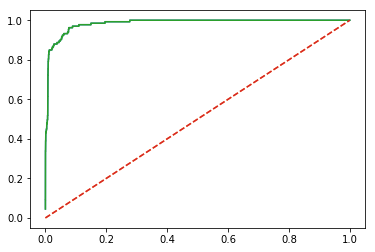

In [137]:
plt.plot(fp_train, tp_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [138]:
fp_test, tp_test, thresholds_test = roc_curve(y_test, probabilities_test[:,1], pos_label=1)

In [139]:
auc(fp_test, tp_test)

0.45506346742157888

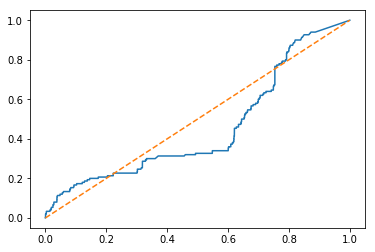

In [140]:
plt.plot(fp_test, tp_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [144]:
p_train,r_train,thresh_train=precision_recall_curve(y_train, probabilities_train[:,1], pos_label=1)

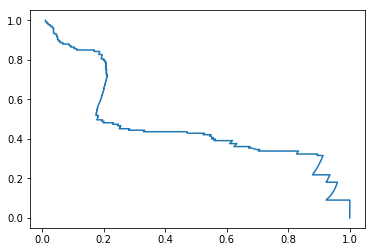

In [154]:
plt.plot(p_train, r_train)

plt.show()

In [146]:
p_test,r_test,thresh_test=precision_recall_curve(y_test, probabilities_test[:,1], pos_label=1)

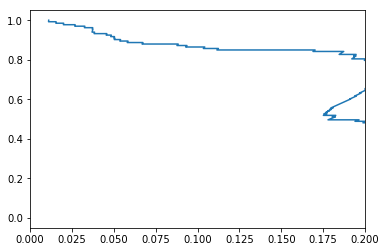

In [153]:
plt.plot(p_train, r_train)
plt.xlim(0,0.2)
plt.show()

In [355]:
print len(true_positives)
print len(false_positives)

63
3857


In [356]:
true_positives['year'].value_counts()

2015    43
2016    18
2017     2
Name: year, dtype: int64

In [357]:
false_positives['year'].value_counts()

2016    1968
2015    1328
2017     561
Name: year, dtype: int64

In [358]:
true_positives[true_positives['year']==2017]

,Unnamed: 0,adverse_reactions,clinical_pharmacology,contraindications,description,dosage_and_administration,how_supplied,indications_and_usage,overdosage,spl_product_data_elements,...,version,veterinary_indications,warnings_and_cautions,when_using,date,month,year,unq_ndc,target,predictions
24406,63496,u advers reaction advers reaction enter diagno...,u clinic pharmacolog import characterist contr...,u contraind administ patient known hypersensit...,u descript md gastroview diatrizo meglumin dia...,u dosag administr gener medium use prepar solu...,u suppli avail aqueou lemon vanilla flavor sol...,u indic usag md gastroview diatrizo meglumin d...,u overdosag see warn regard potenti hypovolemi...,u md gastroview diatrizo meglumin diatrizo sod...,...,9,0,0,0,15,2,2017,0019-4816,1,1
25210,64396,u advers reaction possibl advers effect aris i...,u clinic pharmacolog lactat ringer u2019 irrig...,u contraind inject usual parenter rout electro...,u descript lactat ringer u2019 irrig steril no...,u dosag administr dose depend upon capac surfa...,u suppli lactat ringer u2019 irrig suppli sing...,u indic usag lactat ringer u2019 irrig indic g...,u overdosag event overhydr solut overload eval...,u lactat ringer sodium chlorid sodium lactat p...,...,6,0,0,0,24,2,2017,0409-7828,1,1


In [359]:
false_positives[false_positives['year']==2017]

,Unnamed: 0,adverse_reactions,clinical_pharmacology,contraindications,description,dosage_and_administration,how_supplied,indications_and_usage,overdosage,spl_product_data_elements,...,version,veterinary_indications,warnings_and_cautions,when_using,date,month,year,unq_ndc,target,predictions
1087,4344,u advers reaction virtual patient experi drug ...,u clinic pharmacolog mechan action tretinoin c...,u contraind tretinoin contraind patient known ...,u descript tretinoin usp retinoid induc matur ...,u dosag administr recommend dose 45 mg m2 day ...,u suppli tretinoin capsul avail 10 mg pink ova...,u indic usag tretinoin capsul indic induct rem...,u overdosag case overdos tretinoin revers sign...,u tretinoin tretinoin tretinoin tretinoin buty...,...,1,0,0,0,17,1,2017,68462-792,0,1
1131,4430,u advers reaction follow local advers reaction...,u clinic pharmacolog topic corticosteroid shar...,u contraind desoximetason cream usp 0 05 contr...,u descript desoximetason cream usp 0 05 contai...,u dosag administr appli thin film desoximetaso...,u suppli desoximetason cream usp 0 05 suppli 1...,u indic usag desoximetason cream usp 0 05 indi...,u overdosag topic appli corticosteroid absorb ...,u desoximetason desoximetason desoximetason de...,...,1,0,0,0,19,1,2017,61748-207,0,1
1556,5048,u advers reaction intravascular gener seriou l...,u clinic pharmacolog intravascular follow intr...,u contraind omnipaqu administ patient known hy...,u descript iohexol n n bi 2 3 dihydroxypropyl ...,u dosag administr gener radiopaqu contrast age...,u suppli omnipaqu 300 500 ml pluspak u2122 pol...,u indic usag omnipaqu iohexol inject indic int...,u overdosag overdosag may occur advers effect ...,u omnipaqu iohexol iohexol iohexol iodin trome...,...,2,0,0,0,18,1,2017,0407-1413,0,1
6858,14208,u advers reaction advers reaction report frequ...,u clinic pharmacolog pharmacodynam mechan acti...,u contraind amantadin hydrochlorid tablet cont...,u amantadin hydrochlorid tablet 100mg rx descr...,u dosag administr dose amantadin hydrochlorid ...,u suppli amantadin hydrochlorid tablet avail f...,u indic usag amantadin hydrochlorid tablet ind...,u overdosag death report overdos amantadin hyd...,u amantadin hydrochlorid amantadin hydrochlori...,...,3,0,0,0,9,2,2017,68996-101,0,1
6863,14213,u advers reaction reaction may occur solut ad ...,u clinic pharmacolog sodium chlorid water diss...,NaN,u descript sodium chlorid inject usp 0 9 steri...,u dosag administr sodium chlorid inject usp 0 ...,u suppli product 50090 2488 ndc 50090 2488 0 1...,u indic usag sodium chlorid inject usp 0 9 pre...,u overdosag use diluent solvent intravascular ...,u sodium chlorid sodium chlorid sodium chlorid...,...,1,0,0,0,9,2,2017,50090-2488,0,1
6902,14302,u advers reaction therapeut dose follow report...,u clinic pharmacolog diphenoxyl rapidli extens...,u contraind diphenoxyl hydrochlorid contraind ...,u descript diphenoxyl hydrochlorid atropin sul...,u dosag administr exceed recommend dosag adult...,u suppli product 50090 2641 ndc 50090 2641 0 2...,u indic usag diphenoxyl hydrochlorid effect ad...,u overdosag recommend dosag schedul strictli f...,u diphenoxyl hydrochlorid atropin sulfat diphe...,...,4,0,0,0,16,2,2017,50090-2641,0,1
6945,14397,u 6 advers reaction follow seriou advers event...,u 12 clinic pharmacolog 12 1 mechan action sil...,u 4 contraind sildenafil tablet contraind pati...,u 11 descript sildenafil citrat phosphodiester...,u 2 dosag administr u2022tablet 20 mg three ti...,u 16 suppli storag handl sildenafil tablet sup...,u 1 indic usag sildenafil tablet indic treatme...,u 10 overdosag studi healthi volunt singl dose...,u sildenafil sildenafil sildenafil citrat sild...,...,1,0,1,0,1,2,2017,63187-813,0,1
6947,14399,u advers reaction increas risk follow seriou a...,u clinic pharmacolog combin oral contracept ac...,u contraind oral contracept use women current ...,u descript larin fe 1 5 30 progestogen estroge...,u dosag administr tablet dispens design make o...,u suppli larin u212

In [360]:
true_positives['unq_ndc'].nunique()

33

In [361]:
false_positives['unq_ndc'].nunique()

3780

In [372]:
true_ndc=true_positives['unq_ndc'].unique()

In [373]:
false_ndc=false_positives['unq_ndc'].unique()

In [374]:
for item in true_ndc:
    if item in false_ndc:
        print 'There is a match',item

There is a match 0338-0553
There is a match 0409-2066
There is a match 0409-4699
There is a match 61748-014


In [376]:
matches=[]
for item in false_ndc:
    if item in true_ndc:
        print 'There is a match',item
        matches.append(item)

There is a match 0338-0553
There is a match 0409-2066
There is a match 0409-4699
There is a match 61748-014


In [382]:
len(true_positives[(true_positives['unq_ndc'] ==matches[0])|(true_positives['unq_ndc'] ==matches[1])|(true_positives['unq_ndc'] ==matches[2])|(true_positives['unq_ndc'] ==matches[3])])

9

In [383]:

len(false_positives[(false_positives['unq_ndc'] ==matches[0])|(false_positives['unq_ndc'] ==matches[1])|(false_positives['unq_ndc'] ==matches[2])|(false_positives['unq_ndc'] ==matches[3])])


13

In [384]:
df_all_ndcs_recalled=pd.read_csv('../datasets/all_ndcs_recalled.csv')

In [385]:
df_all_ndcs_recalled.head()

,Unnamed: 0,Unnamed: 0.1,unix,unq_ndc,good_ndcs,company,product
0,0,0,1.140761e+09,23731-8100,1,23731,8100
1,2,2,1.289369e+09,54868-4033,1,54868,4033
2,3,3,1.289369e+09,54868-4973,1,54868,4973
3,7,7,1.334639e+09,0409-1258,1,409,1258
4,9,9,1.336799e+09,0409-1283,1,409,1283


In [386]:
false_positives.head()

,Unnamed: 0,adverse_reactions,clinical_pharmacology,contraindications,description,dosage_and_administration,how_supplied,indications_and_usage,overdosage,spl_product_data_elements,...,version,veterinary_indications,warnings_and_cautions,when_using,date,month,year,unq_ndc,target,predictions
84,494,u advers reaction ceftriaxon inject gener well...,u clinic pharmacolog averag plasma concentr ce...,u contraind ceftriaxon inject contraind patien...,u descript ceftriaxon inject usp steril semisy...,u dosag administr ceftriaxon inject may admini...,u suppli ceftriaxon inject usp suppli steril c...,u indic usag institut treatment ceftriaxon app...,u overdosag case overdosag drug concentr would...,u ceftriaxon ceftriaxon ceftriaxon sodium ceft...,...,1,0,0,0,22,7,2015,61786-379,0,1
108,566,u advers reaction increas risk follow seriou a...,u clinic pharmacolog combin oral contracept ac...,u contraind oral contracept use women current ...,u descript emoquett xae desogestrel ethinyl es...,u dosag administr achiev maximum contracept ef...,u suppli emoquett xae desogestrel ethinyl estr...,u indic usag emoquett xae desogestrel ethinyl ...,u overdosag seriou ill effect report follow ac...,u desogestrel ethinyl estradiol desogestrel et...,...,1,0,0,0,28,7,2015,61786-382,0,1
133,642,u local advers reaction topic corticosteroid l...,u clinic pharmacolog topic corticosteroid shar...,u contraind desoximetason gel usp 0 05 contrai...,u descript desoximetason gel usp 0 05 contain ...,u dosag administr appli thin film desoximetaso...,u suppli desoximetason gel usp 0 05 suppli 15 ...,u indic usag desoximetason gel usp 0 05 indic ...,u overdosag topic appli corticosteroid absorb ...,u desoximetason desoximetason desoximetason de...,...,7,0,0,0,12,8,2016,65179-501,0,1
134,643,u advers reaction gastrointestin heartburn epi...,u clinic pharmacolog oral administr rifampin r...,u contraind rifampin contraind patient histori...,u descript rifampin capsul usp oral administr ...,u dosag administr rifampin administ oral rout ...,u suppli ndc 54569 5770 0 bottl 30 capsul ndc ...,u indic usag treatment tuberculosi meningococc...,u overdosag sign symptom nausea vomit abdomin ...,u rifampin rifampin rifampin rifampin starch c...,...,2,0,0,0,3,5,2016,54569-5770,0,1
150,706,u advers reaction addit warn list follow syndr...,u clinic pharmacolog action mechan action derm...,u contraind hypersensit dapson deriv,u descript dapson usp 4 4 u2019 diaminodipheny...,u dosag administr dermat herpetiformi dosag in...,u suppli dapson tablet usp 25 mg avail white w...,u indic usag dermat herpetiformi h leprosi for...,u overdosag nausea vomit hyperexcit appear min...,u dapson dapson dapson dapson croscarmellos so...,...,2,0,0,0,9,5,2016,29033-036,0,1


In [390]:
match_ndc=list(df_all_ndcs_recalled['unq_ndc'])

In [391]:
match_ndc[0:5]

['23731-8100', '54868-4033', '54868-4973', '0409-1258', '0409-1283']

In [397]:
list_of_matches=[]
for item in false_positives['unq_ndc']:
    if item in match_ndc:
        print "there is a match",item
        list_of_matches.append(item)
print len(list_of_matches)
print len(np.unique(list_of_matches))

there is a match 63323-064
there is a match 0409-7241
there is a match 50111-467
there is a match 0409-7120
there is a match 0068-0510
there is a match 60505-0773
there is a match 60505-0773
there is a match 0338-0709
there is a match 0338-0709
there is a match 0409-7953
there is a match 0409-2344
there is a match 0555-0324
there is a match 0409-3815
there is a match 65162-212
there is a match 0409-2344
there is a match 61703-303
there is a match 63323-010
there is a match 25021-830
there is a match 63323-970
there is a match 68546-317
there is a match 68546-317
there is a match 68546-317
there is a match 0264-3103
there is a match 0338-0553
there is a match 0409-2066
there is a match 0074-3642
there is a match 0574-0129
there is a match 0409-4699
there is a match 0409-4699
there is a match 0409-4699
there is a match 0409-4699
there is a match 0409-4699
there is a match 0409-4699
there is a match 0409-4699
there is a match 0409-4699
there is a match 0409-4699
there is a match 0409-4699

In [398]:
54/3857.0

0.014000518537723619

In [399]:
len(false_positives[false_positives['year']==2016])

1968

In [420]:
fp_5_15=false_positives[(false_positives['year']==2015)&(false_positives['month']==5)]

In [421]:
for item in false_positives['unq_ndc']:
    if item not in match_ndc:
        print "this one is not recalled",item


this one is not recalled 61786-379
this one is not recalled 61786-382
this one is not recalled 65179-501
this one is not recalled 54569-5770
this one is not recalled 29033-036
this one is not recalled 57297-882
this one is not recalled 57297-875
this one is not recalled 68788-6409
this one is not recalled 55150-259
this one is not recalled 63187-712
this one is not recalled 69189-0711
this one is not recalled 63187-646
this one is not recalled 69189-1710
this one is not recalled 69189-0551
this one is not recalled 65841-821
this one is not recalled 68382-706
this one is not recalled 62559-430
this one is not recalled 29033-030
this one is not recalled 10135-613
this one is not recalled 63187-480
this one is not recalled 58118-0008
this one is not recalled 51021-278
this one is not recalled 51285-754
this one is not recalled 43063-625
this one is not recalled 69189-0737
this one is not recalled 69329-251
this one is not recalled 70385-2008
this one is not recalled 63187-672
this one is 

this one is not recalled 69621-343
this one is not recalled 57297-843
this one is not recalled 42291-350
this one is not recalled 0713-0669
this one is not recalled 76282-340
this one is not recalled 50090-2368
this one is not recalled 69945-601
this one is not recalled 69329-290
this one is not recalled 61919-407
this one is not recalled 0904-6566
this one is not recalled 10135-581
this one is not recalled 68151-2791
this one is not recalled 55700-315
this one is not recalled 58118-1210
this one is not recalled 43386-069
this one is not recalled 43063-626
this one is not recalled 50090-2446
this one is not recalled 0409-4646
this one is not recalled 51021-374
this one is not recalled 59088-375
this one is not recalled 70385-2009
this one is not recalled 68071-1921
this one is not recalled 69189-0340
this one is not recalled 50090-1734
this one is not recalled 55695-032
this one is not recalled 63187-738
this one is not recalled 51862-077
this one is not recalled 45963-906
this one is 

this one is not recalled 10147-0781
this one is not recalled 63323-393
this one is not recalled 0078-0662
this one is not recalled 68788-9037
this one is not recalled 52584-411
this one is not recalled 0409-1402
this one is not recalled 61703-304
this one is not recalled 68788-0523
this one is not recalled 49349-448
this one is not recalled 65224-880
this one is not recalled 65862-009
this one is not recalled 61919-357
this one is not recalled 0173-0602
this one is not recalled 61919-046
this one is not recalled 0178-0796
this one is not recalled 61919-009
this one is not recalled 68788-9156
this one is not recalled 0409-6664
this one is not recalled 69604-204
this one is not recalled 55154-2392
this one is not recalled 62135-266
this one is not recalled 61919-082
this one is not recalled 68788-9386
this one is not recalled 0338-0519
this one is not recalled 0338-0520
this one is not recalled 0409-1276
this one is not recalled 17478-171
this one is not recalled 61570-047
this one is no

this one is not recalled 0603-7525
this one is not recalled 68788-8932
this one is not recalled 76420-524
this one is not recalled 42291-284
this one is not recalled 16714-464
this one is not recalled 0115-1469
this one is not recalled 42291-283
this one is not recalled 65857-100
this one is not recalled 51079-142
this one is not recalled 67253-651
this one is not recalled 51672-1363
this one is not recalled 0703-3675
this one is not recalled 0085-0962
this one is not recalled 24338-020
this one is not recalled 68084-956
this one is not recalled 55301-069
this one is not recalled 0093-1010
this one is not recalled 55289-099
this one is not recalled 55150-234
this one is not recalled 68151-4123
this one is not recalled 45802-119
this one is not recalled 54569-3902
this one is not recalled 13548-010
this one is not recalled 0316-0123
this one is not recalled 0378-6993
this one is not recalled 60505-2544
this one is not recalled 55154-5026
this one is not recalled 0517-6510
this one is no

this one is not recalled 0378-6015
this one is not recalled 0264-3145
this one is not recalled 65580-644
this one is not recalled 42023-105
this one is not recalled 60505-0133
this one is not recalled 52609-0006
this one is not recalled 63629-5431
this one is not recalled 0338-0551
this one is not recalled 69166-523
this one is not recalled 55301-311
this one is not recalled 0378-0347
this one is not recalled 51079-051
this one is not recalled 0378-3007
this one is not recalled 55154-7274
this one is not recalled 55154-5044
this one is not recalled 23155-179
this one is not recalled 50383-804
this one is not recalled 49411-050
this one is not recalled 16781-194
this one is not recalled 51079-129
this one is not recalled 68462-309
this one is not recalled 0270-1410
this one is not recalled 61480-124
this one is not recalled 60758-801
this one is not recalled 16714-025
this one is not recalled 51672-1295
this one is not recalled 45802-040
this one is not recalled 55154-6707
this one is n

In [422]:
false_positives['unq_ndc'].tail()

43935    49999-538
43940    0009-3359
43941    0527-1475
43943    24478-140
43949    16714-601
Name: unq_ndc, dtype: object

In [425]:
print df_train['target'].sum()
print df_test['target'].sum()
print len(df_train)
print len(df_test)


132
150
40876
43952


In [426]:
40876+43952

84828

In [427]:
132+150

282

In [428]:
282/85000.0

0.0033176470588235293

In [430]:
282/84828.0

0.0033243740274437688

In [432]:
true_positives['adverse_reactions']

24406    u advers reaction advers reaction enter diagno...
25210    u advers reaction possibl advers effect aris i...
25412    u 6 advers reaction follow advers reaction dis...
27257    u 6 advers reaction common advers reaction rep...
27942    u advers reaction gastrointestin heartburn epi...
28196    u advers reaction infus relat event soon rapid...
29779    u advers reaction advers effect parenter admin...
30953    u advers reaction observ control clinic studi ...
31703    u advers reaction safeti data avail 30 000 pat...
32407    u advers reaction potenti advers reaction benz...
32483    u advers reaction headach rash pruritu occasio...
32842    u advers reaction bodi whole report incid alle...
32973    u advers reaction post market advers reaction ...
32974    u advers reaction post market advers reaction ...
32975    u advers reaction post market advers reaction ...
32976    u advers reaction post market advers reaction ...
32978    u advers reaction post market advers reaction .

In [ ]:
Z=linkage(adv_reac_bool_test)

In [441]:
plt.title('Dendrogram')
dendrogram(adv_reac_bool_test)

ValueError: Linkage matrix 'Z' must have 4 columns.